In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [5]:
#reading data and sepreating the dependant and independant variable
dataset = pd.read_csv('trainfy.csv')
z_scores = stats.zscore(dataset)
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
dataset = dataset.drop(outlier_indices)
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
print('Shape of input dataset is ', X.shape)
print ('Shape of output dataset is ', Y.shape)
#spiliting the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=0)
print('Training dataset size is ', X_train.shape)
print('Testing dataset size is  ', X_test.shape)

Shape of input dataset is  (847, 13)
Shape of output dataset is  (847,)
Training dataset size is  (677, 13)
Testing dataset size is   (170, 13)


In [6]:
print(outlier_indices)

[  4   5  13  14  17  22  23  39  40  40  90  90  95 100 105 110 115 123
 124 125 126 133 134 135 136 143 144 145 146 162 163 166 171 172 180 181
 205 215 247 252 257 262 285 299 300 308 309 317 318 326 327 330 331 341
 393 398 403 408 413 418 423 428 433 438 443 448 451 453 457 458 458 466
 467 468 469 476 477 478 479 486 487 488 489 496 497 498 499 506 507 508
 509 516 517 518 519 534 549 550 551 563 564 613 614 663 664 684 713 763
 764 788 813 814 834 884 938]


In [7]:
dataset.describe()

,Angle,Length,Ht_E,UW_E,Ht_SS,Void Ratio,UW_SS,Lamda,Kappa,PR,FA,OCR,Permeability,After 1 year
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,2.434475,7.275089,5.015348,19.520661,5.518300,1.959726,16.288654,0.386624,0.046341,0.317473,5.794392,1.532409,8.884082,135.530106
std,0.756464,1.771492,0.772458,0.762127,2.136441,0.694379,1.064701,0.237980,0.025750,0.021288,1.558482,0.632911,0.826933,83.775007
min,1.000000,6.000000,4.000000,18.000000,2.000000,0.500000,12.650000,0.042500,0.010000,0.210000,1.500000,1.000000,6.698970,18.000000
25%,2.000000,6.000000,4.000000,19.000000,4.000000,1.600000,16.000000,0.210000,0.026000,0.300000,5.000000,1.100000,8.221849,76.000000
50%,3.000000,6.000000,5.000000,20.000000,5.000000,1.810000,16.500000,0.330000,0.041000,0.320000,5.000000,1.400000,9.000000,112.000000
75%,3.000000,10.000000,6.000000,20.000000,7.000000,2.450000,16.500000,0.520000,0.065000,0.320000,6.500000,1.700000,9.698970,170.000000
max,3.000000,10.000000,6.000000,20.000000,9.000000,3.300000,20.000000,1.090000,0.123000,0.370000,10.500000,4.500000,10.397940,470.000000


LR training phase MAE, MSE, RMSE, r2 score is  29.089540627076893 1747.171877770023 41.799185132847064 0.7551929167391173


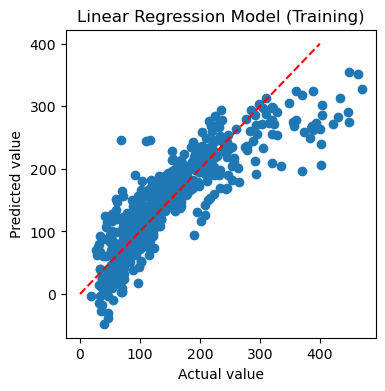

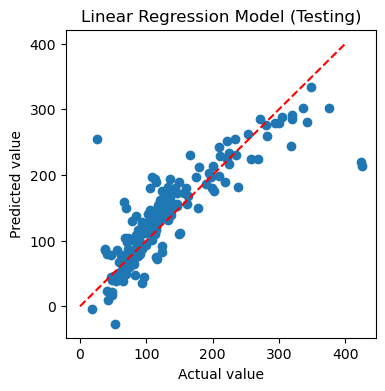

In [8]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(X_train, Y_train)
Y_predict_train=reg.predict(X_train)
Y_predict_test=reg.predict(X_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
r2_score_train = r2_score(Y_train,Y_predict_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
r2_score_test = r2_score(Y_test,Y_predict_test)
print('LR training phase MAE, MSE, RMSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
# Create a square plot
plt.figure(figsize=(4, 4))

# Plot a red diagonal line
plt.plot([0, 400], [0, 400], 'r--')

# Scatter plot for training data
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Linear Regression Model (Training)")

# Show the plot
plt.show()

# Create a square plot
plt.figure(figsize=(4, 4))

# Plot a red diagonal line
plt.plot([0, 400], [0, 400], 'r--')

# Scatter plot for testing data
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Linear Regression Model (Testing)")

# Show the plot
plt.show()

In [29]:
reg.intercept_

-386.50922542309354

PR training phase MAE, MSE, RMSE, RMLSE, r2 score is  13.084581659694784 493.17552311753474 22.207555541246197 0.9308981200497805
PR testing phase MAE, MSE, RMSE, r2 score is  18.577676261518523 1219.2697979531322 34.91804401671337 0.8122299680287215


Text(0.5, 1.0, 'Polynomial Regression model')

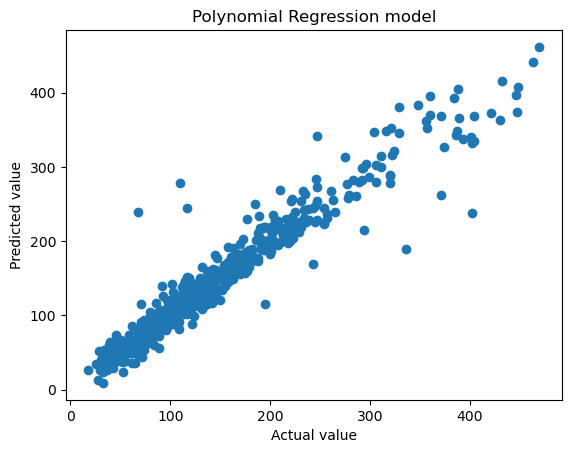

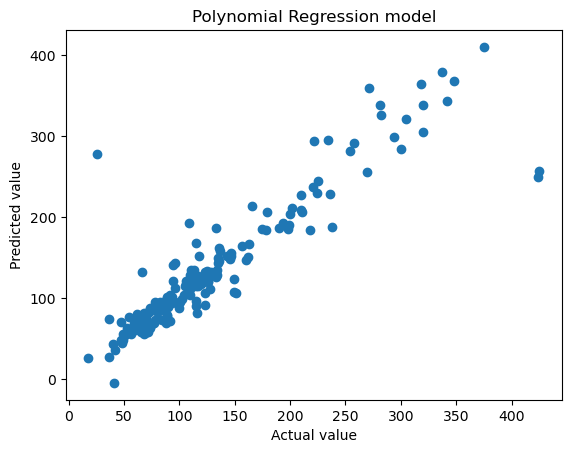

In [27]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
poly=PolynomialFeatures(degree=2)
X_poly= poly.fit_transform(X_train)
poly.fit(X_poly, Y_train)
reg_poly=LinearRegression()
reg_poly.fit(X_poly, Y_train)

Y_predict_train=reg_poly.predict(poly.fit_transform(X_train))
Y_predict_test=reg_poly.predict(poly.fit_transform(X_test))

mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
# rmlse_train = mean_squared_log_error(Y_train, Y_predict_train)
r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
# rmlse_test = mean_squared_log_error(Y_test, Y_predict_test)
r2_score_test = r2_score(Y_test,Y_predict_test)
print('PR training phase MAE, MSE, RMSE, RMLSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Polynomial Regression model")
print('PR testing phase MAE, MSE, RMSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Polynomial Regression model")


SVR training phase MAE, MSE, RMSE, r2 score is  44.02206864841116 4794.575921006335 69.24287631956327 0.2813152172002581
SVR testing phase MAE, MSE, RMSE, r2 score is  44.32161877663311 4909.001123759422 70.06426424190452 0.261629484002355


Text(0.5, 1.0, 'Support Vector non Linear Regression model')

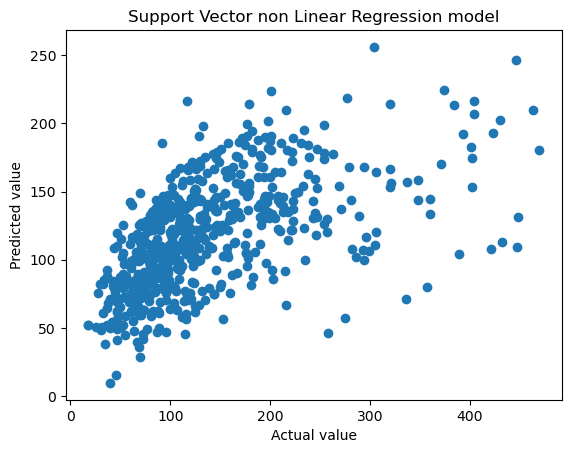

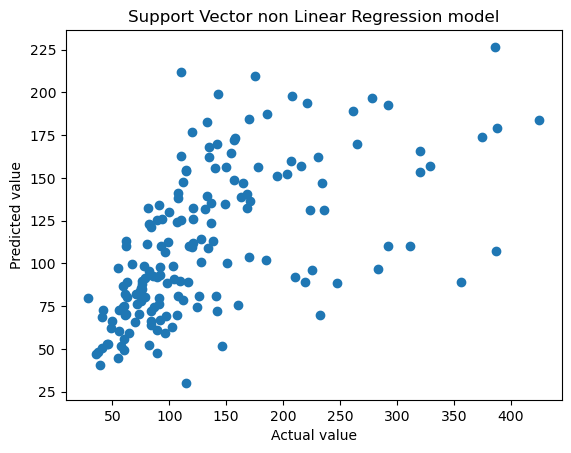

In [31]:
#support vector non linear regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
reg=SVR(kernel='linear')
reg.fit(X_train, Y_train)

Y_predict_train=reg.predict(X_train)
Y_predict_test=reg.predict(X_test)

mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
# rmlse_train = mean_squared_log_error(Y_train, Y_predict_train)
r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
# rmlse_test = mean_squared_log_error(Y_test, Y_predict_test)
r2_score_test = r2_score(Y_test,Y_predict_test)
print('SVR training phase MAE, MSE, RMSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Support Vector non Linear Regression model")
print('SVR testing phase MAE, MSE, RMSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Support Vector non Linear Regression model")


SVR training phase MAE, MSE, RMSE, RMLSE, r2 score is  19.279686086433575 1742.3048900247059 41.74092584053097 0.7558748605646546
SVR testing phase MAE, MSE, RMSE, r2 score is  24.898204820403702 2285.6735661612715 47.80871851620028 0.6480016159553019


Text(0.5, 1.0, 'Support Vector non Linear Regression model')

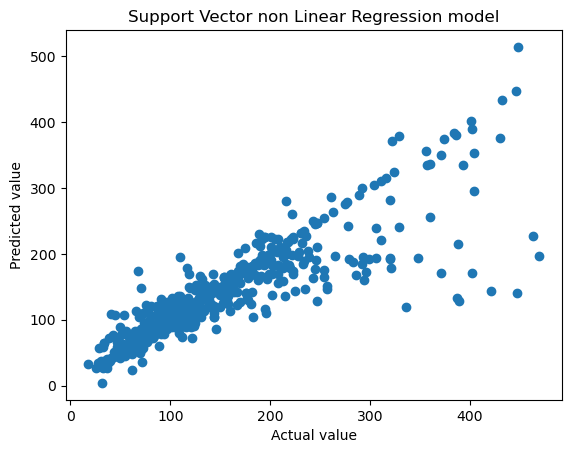

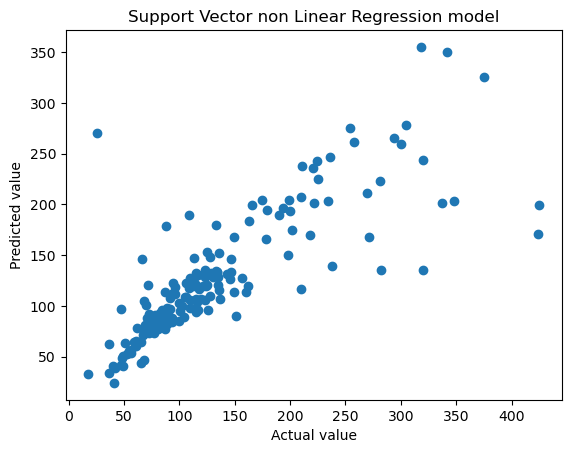

In [36]:
#support vector non linear regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
reg=SVR(kernel='poly', degree=16)
reg.fit(X_train, Y_train)

Y_predict_train=reg.predict(X_train)
Y_predict_test=reg.predict(X_test)

mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
# rmlse_train = mean_squared_log_error(Y_train, Y_predict_train)

r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
# rmlse_test = mean_squared_log_error(Y_test, Y_predict_test)
r2_score_test = r2_score(Y_test,Y_predict_test)
print('SVR training phase MAE, MSE, RMSE, RMLSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Support Vector non Linear Regression model")
print('SVR testing phase MAE, MSE, RMSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Support Vector non Linear Regression model")


In [34]:
#Decesion tree non linear regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
dataset = pd.read_csv('trainfy.csv')
z_scores = stats.zscore(dataset)
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
dataset = dataset.drop(outlier_indices)
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
print('Shape of input dataset is ', X.shape)
print ('Shape of output dataset is ', Y.shape)
#spiliting the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)
print('Training dataset size is ', X_train.shape)
print('Testing dataset size is  ', X_test.shape)
reg=DecisionTreeRegressor(random_state=1)
reg.fit(X_train, Y_train)

Y_predict_train=reg.predict(X_train)
Y_predict_test=reg.predict(X_test)

mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)

r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)

r2_score_test = r2_score(Y_test,Y_predict_test)
print('DTR training phase MAE, MSE, RMSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Decision Tree non Linear Regression model")
print('DTR testing phase MAE, MSE, RMSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Decision Tree non Linear Regression model")


Shape of input dataset is  (826, 13)
Shape of output dataset is  (826,)
Training dataset size is  (619, 13)
Testing dataset size is   (207, 13)
DTR training phase MAE, MSE, RMSE, r2 score is  0.0 0.0 0.0 1.0
DTR testing phase MAE, MSE, RMSE, r2 score is  23.980676328502415 2247.7391304347825 47.41032725509056 0.6554116507640176


Shape of input dataset is  (826, 13)
Shape of output dataset is  (826,)
Training dataset size is  (619, 13)
Testing dataset size is   (207, 13)
RFR training phase MAE, MSE, RMSE, r2 score is  7.5479159935379645 206.748740549273 14.37876004908883 0.9692048612933719
RFR testing phase MAE, MSE, r2 score is  17.443478260869565 1021.1486067632851 31.955415922238988 0.8434534025925331


Text(0.5, 1.0, 'Random Forest non Linear Regression model')

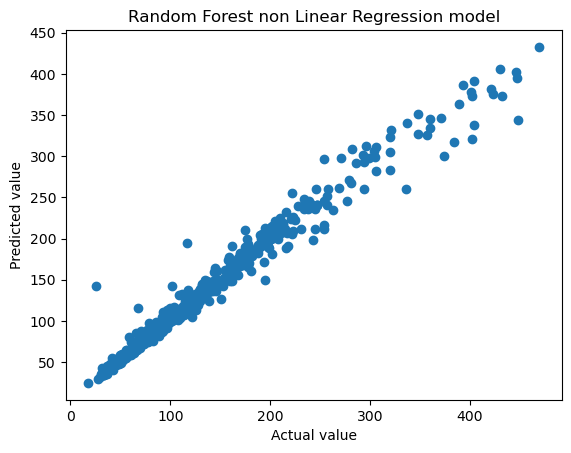

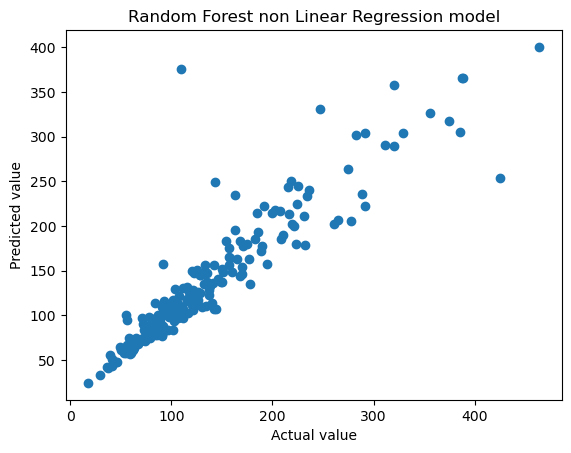

In [35]:
#Random Forest non linear regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
dataset = pd.read_csv('trainfy.csv')
z_scores = stats.zscore(dataset)
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
dataset = dataset.drop(outlier_indices)
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
print('Shape of input dataset is ', X.shape)
print ('Shape of output dataset is ', Y.shape)
#spiliting the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)
print('Training dataset size is ', X_train.shape)
print('Testing dataset size is  ', X_test.shape)
reg=RandomForestRegressor(n_estimators=50, random_state=1)
reg.fit(X_train, Y_train)

Y_predict_train=reg.predict(X_train)
Y_predict_test=reg.predict(X_test)

mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = mean_squared_error(Y_train, Y_predict_train, squared=False)
# rmlse_train = mean_squared_log_error(Y_train, Y_predict_train)
r2_score_train = r2_score(Y_train,Y_predict_train)

mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = mean_squared_error(Y_test, Y_predict_test, squared=False)
# rmlse_test = mean_squared_log_error(Y_test, Y_predict_test)

r2_score_test = r2_score(Y_test,Y_predict_test)
print('RFR training phase MAE, MSE, RMSE, r2 score is ', mae_train, mse_train, rmse_train, r2_score_train)
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Random Forest non Linear Regression model")
print('RFR testing phase MAE, MSE, r2 score is ', mae_test, mse_test, rmse_test, r2_score_test)
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title("Random Forest non Linear Regression model")

ANN training phase MAE, MSE, RMSE, R2 score: 22.620309780045602 1298.4517900728736 36.03403654980765 0.8180658700343088
ANN testing phase MAE, MSE, RMSE, R2 score: 25.631744518845903 1796.2335327453006 42.38199538418762 0.7233763778634723


C:\Users\Abhishek Kumar Singh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


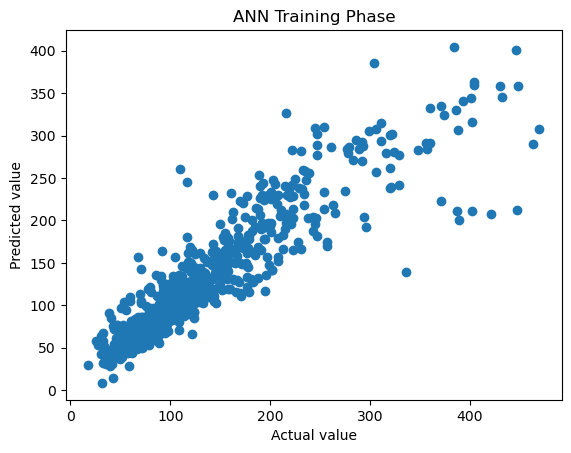

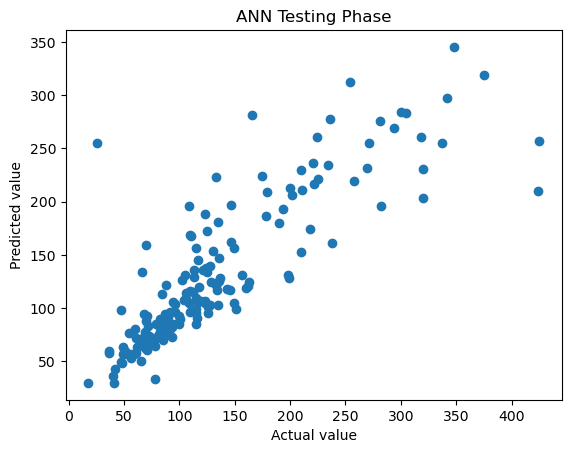

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, Y_train)

# Predict on training and testing data
Y_predict_train = model.predict(X_train)
Y_predict_test = model.predict(X_test)

# Calculate evaluation metrics for training data
mae_train = mean_absolute_error(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)
rmse_train = np.sqrt(mse_train)
r2_score_train = r2_score(Y_train, Y_predict_train)

# Calculate evaluation metrics for testing data
mae_test = mean_absolute_error(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
rmse_test = np.sqrt(mse_test)
r2_score_test = r2_score(Y_test, Y_predict_test)

# Print evaluation metrics for training data
print('ANN training phase MAE, MSE, RMSE, R2 score:', mae_train, mse_train, rmse_train, r2_score_train)

# Plot actual vs predicted values for training data
plt.figure(1)
plt.scatter(Y_train, Y_predict_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('ANN Training Phase')

# Print evaluation metrics for testing data
print('ANN testing phase MAE, MSE, RMSE, R2 score:', mae_test, mse_test, rmse_test, r2_score_test)

# Plot actual vs predicted values for testing data
plt.figure(2)
plt.scatter(Y_test, Y_predict_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('ANN Testing Phase')

# Show the plots
plt.show()
n = X_test.shape[0]   # Number of observations in the test set
p = X_test.shape[1]   # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2_score_test) * (n - 1) / (n - p - 1))

print("R-squared:", r2_score_test)
print("Adjusted R-squared:", adjusted_r2)

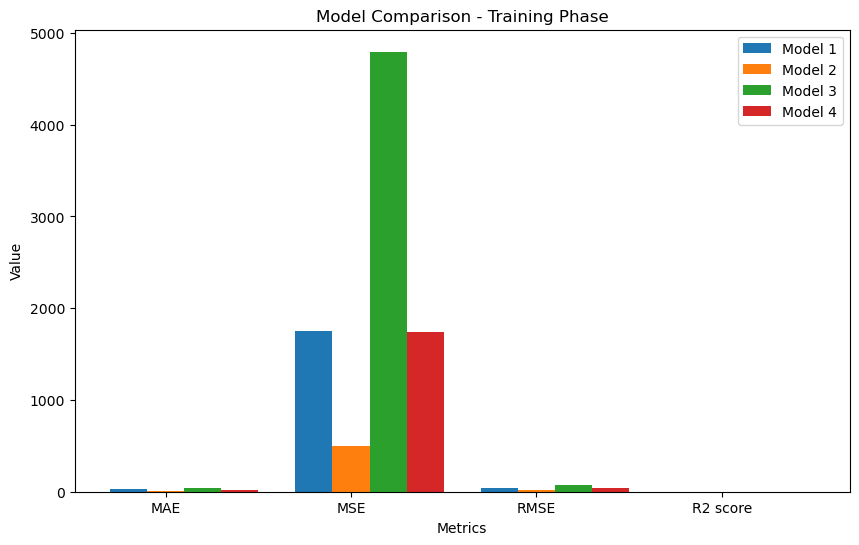

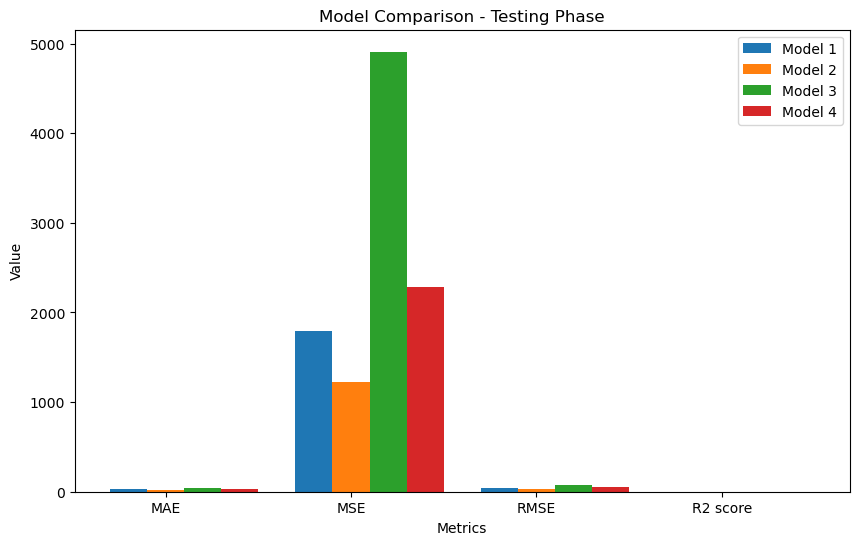

In [40]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Metrics for linear regression (LR)
# lr_training = [29.09, 1747.17, 41.80, 0.76]
# lr_testing = [27.78, 1797.32, 42.39, 0.72]

# # Metrics for polynomial regression (PR)
# pr_training = [13.08, 493.18, 22.21, 0.93]
# pr_testing = [18.58, 1219.27, 34.92, 0.81]

# # Metrics for support vector regression (SVR)
# svr_training = [44.02, 4794.58, 69.24, 0.28]
# svr_testing = [44.32, 4909.00, 70.06, 0.26]

# # Metrics for support vector regression with polynomial kernel (SVR)
# svr_poly_training = [19.28, 1742.30, 41.74, 0.76]
# svr_poly_testing = [24.90, 2285.67, 47.81, 0.65]

# # Create labels for the metrics
# labels = ['MAE', 'MSE', 'RMSE', 'R2 score']

# # Create arrays for training and testing metrics
# training_metrics = [lr_training, pr_training, svr_training, svr_poly_training]
# testing_metrics = [lr_testing, pr_testing, svr_testing, svr_poly_testing]

# # Plotting the bar graphs for training phase
# plt.figure(figsize=(10, 6))
# width = 0.2
# x = np.arange(len(labels))

# for i, metrics in enumerate(training_metrics):
#     plt.bar(x + (i * width), metrics, width=width, label='Model ' + str(i+1))

# plt.xlabel('Metrics')
# plt.ylabel('Value')
# plt.title('Model Comparison - Training Phase')
# plt.xticks(x + width, labels)
# plt.legend()
# plt.show()

# # Plotting the bar graphs for testing phase
# plt.figure(figsize=(10, 6))

# for i, metrics in enumerate(testing_metrics):
#     plt.bar(x + (i * width), metrics, width=width, label='Model ' + str(i+1))

# plt.xlabel('Metrics')
# plt.ylabel('Value')
# plt.title('Model Comparison - Testing Phase')
# plt.xticks(x + width, labels)
# plt.legend()
# plt.show()


In [ ]:
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense
# #adding_input_and_hidden_layer
# model=Sequential()

In [ ]:
# model.add(Dense(10, init='uniform', activation='relu', input_dim=5))